In [1]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('./data/dataset.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## 1. Clean up

In [4]:
df['_s'] = pd.to_datetime(df.ScheduledDay)
df['ScheduledHour'] = df._s.apply(lambda t: t.hour)
df['SchedDay'] = df._s.apply(lambda x: x.day)

In [5]:
df.PatientId = df.PatientId.astype('int64')

df.ScheduledDay = pd.to_datetime(df.ScheduledDay).dt.date.astype('datetime64[ns]')
df.AppointmentDay = pd.to_datetime(df.AppointmentDay).dt.date.astype('datetime64[ns]')

df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

df.drop(['PatientId', 'AppointmentID', 'Scholarship', 'Alcoholism', '_s'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hypertension,Diabetes,Handicap,SMSReceived,NoShow,ScheduledHour,SchedDay
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,1,0,0,0,No,18,29
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,No,16,29
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,No,16,29
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,No,17,29
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,1,1,0,0,No,16,29


In [6]:
df.Age = df.Age.astype("object")
df.Hypertension = df.Hypertension.astype("object")
df.Diabetes = df.Diabetes.astype("object")
df.Handicap = df.Handicap.astype("object")
df.SMSReceived = df.SMSReceived.astype("object")

In [7]:
# convert Date to days for a clearer picture
df['WaitingPeriod'] = df.AppointmentDay - df.ScheduledDay 
df['WaitingPeriod'] = df['WaitingPeriod'].dt.days

df['AppointmentDOW'] = df.AppointmentDay.dt.day_name()
df['ScheduledDOW'] = df.ScheduledDay.dt.day_name()
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hypertension,Diabetes,Handicap,SMSReceived,NoShow,ScheduledHour,SchedDay,WaitingPeriod,AppointmentDOW,ScheduledDOW
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,1,0,0,0,No,18,29,0,Friday,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,No,16,29,0,Friday,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,No,16,29,0,Friday,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,No,17,29,0,Friday,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,1,1,0,0,No,16,29,0,Friday,Friday


- checking for errors and NaNs

In [8]:
print('Age:',sorted(df.Age.unique()))
print('Gender:', df.Gender.unique())
print('AppointmentDay:', df.AppointmentDay.unique())
print('Diabetes:', df.Diabetes.unique())
print('Hypertension:', df.Hypertension.unique())
print('Handicap:', df.Handicap.unique())
print('Sms_Reminder:', df.SMSReceived.unique())
print('Appointment Day:',sorted(df.AppointmentDay.unique()))
print('Scheduled Day:', sorted(df.ScheduledDay.unique()))

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
AppointmentDay: ['2016-04-29T00:00:00.000000000' '2016-05-03T00:00:00.000000000'
 '2016-05-10T00:00:00.000000000' '2016-05-17T00:00:00.000000000'
 '2016-05-24T00:00:00.000000000' '2016-05-31T00:00:00.000000000'
 '2016-05-02T00:00:00.000000000' '2016-05-30T00:00:00.000000000'
 '2016-05-16T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2016-05-19T00:00:00.000000000' '2016-05-12T00:00:00.000000000'
 '2016-05-06T00:00:00.000000000' '2016-05-20T00:00:00.000000000'
 '2016-05-05T00:00:00.000000000' '2016-05-13T00:00:00.000000000'
 '2016-05-09T00:00:00.000000000

In [9]:
df = df[(df.Age >= 0) & (df.Age <= 95)]

- checking for outliers

## 2. Data Visualization

   ### 2.1 Total No Shows

Text(0.5, 1.0, 'Total number of missed appointments')

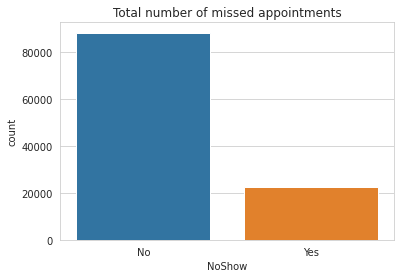

In [10]:
ax = sns.countplot(x=df.NoShow, data=df)
ax.set_title("Total number of missed appointments")



   
   - **vast majority of the patients do show up for their appointments**



In [11]:
df.head(n=20)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hypertension,Diabetes,Handicap,SMSReceived,NoShow,ScheduledHour,SchedDay,WaitingPeriod,AppointmentDOW,ScheduledDOW
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,1,0,0,0,No,18,29,0,Friday,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,No,16,29,0,Friday,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,No,16,29,0,Friday,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,No,17,29,0,Friday,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,1,1,0,0,No,16,29,0,Friday,Friday
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,1,0,0,0,No,8,27,2,Friday,Wednesday
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,Yes,15,27,2,Friday,Wednesday
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,Yes,15,27,2,Friday,Wednesday
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,No,8,29,0,Friday,Friday
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,No,12,27,2,Friday,Wednesday


   ### 2.2 Gender analysis

Text(0.5, 1.0, 'Total No-Shows vs Gender')

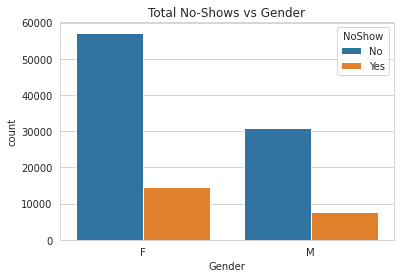

In [40]:
ax = sns.countplot(x=df.Gender, hue=df.NoShow)
ax.set_title("Total No-Shows vs Gender")

   - **Female patients tend to miss more appointments but they also make a lot more appointments than men**

   ### 2.3 Age analysis

Text(0.5, 1.0, 'Range of the patient age')

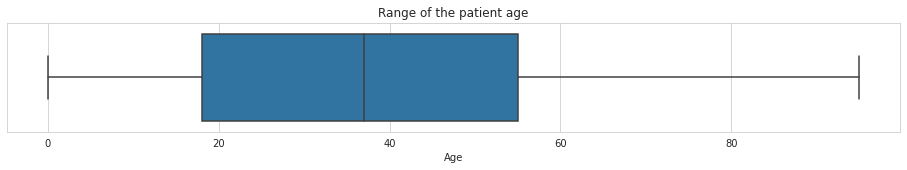

In [41]:
plt.figure(figsize=(16,2))
ax = sns.boxplot(x=df.Age)
ax.set_title("Range of the patient age")

   - **The box plot reveales the median age as around 38 and the distribution of the patients ages**

Text(0.5, 1.0, 'No Shows plotted as a function of age')

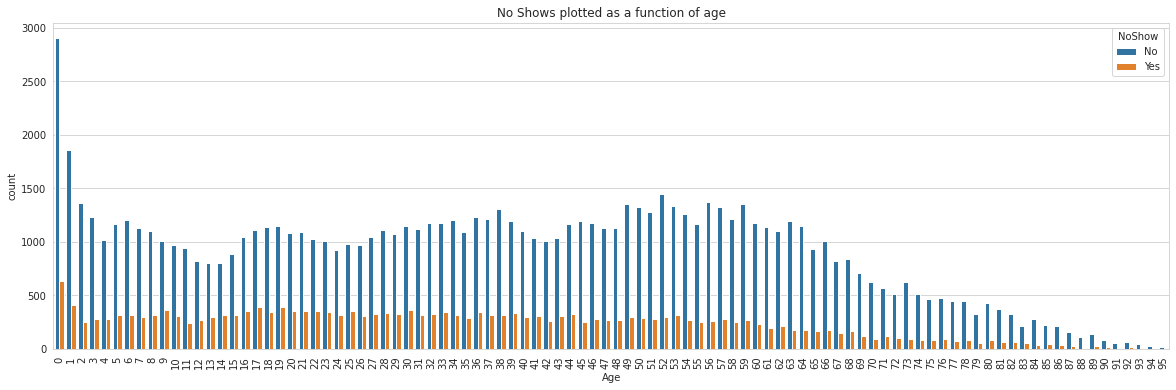

In [42]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
p = sns.countplot(x=df.Age, hue=df.NoShow)
p.set_title("No Shows plotted as a function of age")

Text(0.5, 1.0, 'What age of people missed the most appointments?')

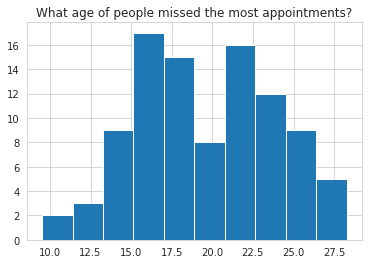

In [80]:
NoShowvsAge = df[df.NoShow == 'Yes'].groupby(['Age']).size() / df.groupby(['Age']).size() * 100
plt.hist(x=NoShowvsAge)
plt.title("What age of people missed the most appointments?")

</br>

   - **the rate of missing an appointment is pretty uniform across the age range. But of the data provided, majority of the appointments are missed by people in their 20s**

</br>

### 2.4 Neighbourhood Analysis

Text(0.5, 1.0, 'Which neighbourhood had the most cancellations?')

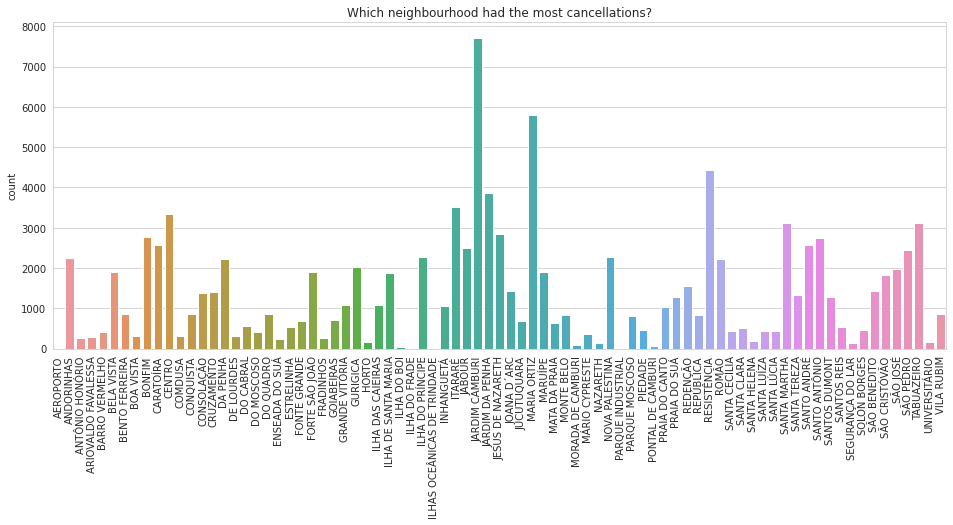

In [78]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Neighbourhood))
ax.set_title("Which neighbourhood had the most cancellations?")

  - **The number of patients from Jardim Camburi, Maria Ortiz, and Resistencia higher than other neighbourhoods**

  - **As in the case with age, the rate of missing an appointment is pretty uniform across the whole dataset**

### 2.5 Symptoms Analysis

     - Hypertension

Text(0.5, 1.0, 'Hypertension patients missing appointments')

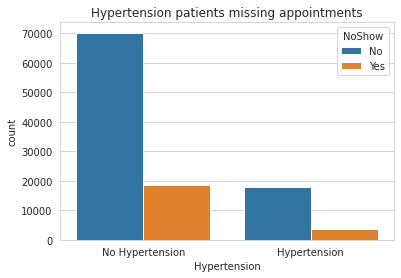

In [44]:
ax = sns.countplot(x=df.Hypertension, hue=df.NoShow)
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
ax.set_title("Hypertension patients missing appointments")

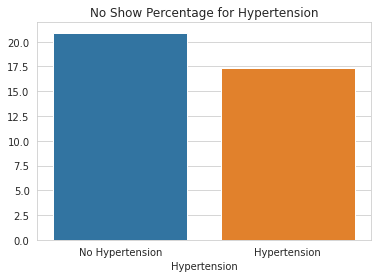

In [18]:
hypertension_ratio = df[df.NoShow == 'Yes'].groupby(['Hypertension']).size()/df.groupby(['Hypertension']).size() * 100

ax = sns.barplot(x = hypertension_ratio.index, y=hypertension_ratio)
ax.set_title("No Show Percentage for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

   - **Of the 70000 patients with no hypertension, 80% showed up for their appointment, whereas of the 18,000 patients with hypertension 83.5% of the patients showed up.**
   - **People with hypertension tend to miss lesser appointments by about a factor of 80%**

     - Diabetes

Text(0.5, 1.0, 'Diabetes patients missing appointments')

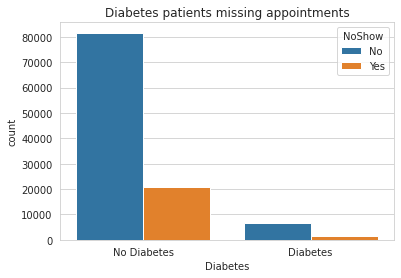

In [45]:
ax = sns.countplot(x=df.Diabetes, hue=df.NoShow)
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
ax.set_title("Diabetes patients missing appointments")

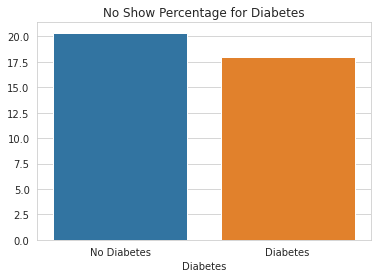

In [20]:
diabetics_ratio = df[df.NoShow == 'Yes'].groupby(['Diabetes']).size()/df.groupby(['Diabetes']).size() * 100

ax = sns.barplot(x = diabetics_ratio.index, y=diabetics_ratio)
ax.set_title("No Show Percentage for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

   - **Of the 80,000 patients with no diabetes, 80% of them showed up for an appointment**
   - **Of the 6,000 patients with diabetes, 82.5% showed up for their appointment**
   - **People with diabetes tend to miss lesser appointments by about a factor of 80%**

    - Handicap

Text(0.5, 1.0, 'Handicap patients missing appointments')

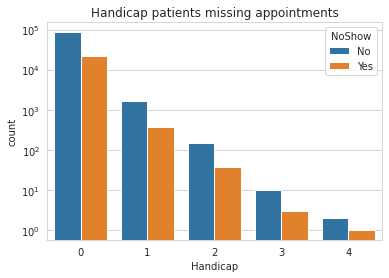

In [46]:
ax = sns.countplot(x=df.Handicap, hue=df.NoShow, log=True)
ax.set_title("Handicap patients missing appointments")

Text(0.5, 1.0, 'No Show Percentage for Handicap')

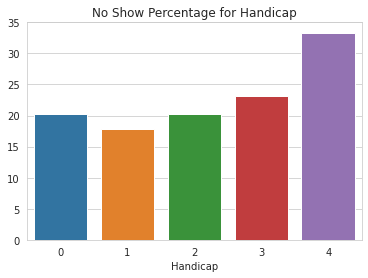

In [22]:
handicap_ratio = df[df.NoShow == 'Yes'].groupby(['Handicap']).size()/df.groupby(['Handicap']).size() * 100

ax = sns.barplot(x = handicap_ratio.index, y=handicap_ratio)
ax.set_title("No Show Percentage for Handicap")

   - **The level 4 handicap patients have a much higher incidence of missing appointments**

### 2.6 SMS Analysis

[Text(0, 0, 'No SMS'), Text(1, 0, 'SMS')]

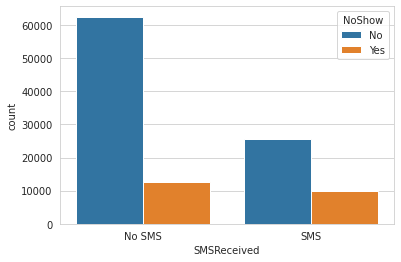

In [23]:
ax = sns.countplot(x=df.SMSReceived, hue=df.NoShow)
x_ticks_labels=['No SMS', 'SMS']
ax.set_xticklabels(x_ticks_labels)
ax.set_title("Patients vs SMS missing appointments")

[Text(0, 0, 'No SMS'), Text(1, 0, 'SMS')]

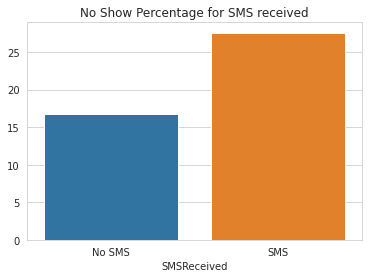

In [24]:
SMS_noshow = df[df.NoShow == 'Yes'].groupby('SMSReceived').size() / df.groupby("SMSReceived").size() * 100

ax = sns.barplot(x=SMS_noshow.index, y=SMS_noshow)
ax.set_title("No Show Percentage for SMS received")
x_ticks_labels=['No SMS', 'SMS']
ax.set_xticklabels(x_ticks_labels)

   - **Of the 61,000 patients who didn't get a SMS, 84% made their appointment**
   - **Of the 25,000 patients who did get an SMS, 73% made their appointment**
   
   ##### A reminder of the appointment should lead to a higher appointment rate but the data shows otherwise.

Text(0.5, 1.0, 'When SMS was sent, what age of people missed an appointment?')

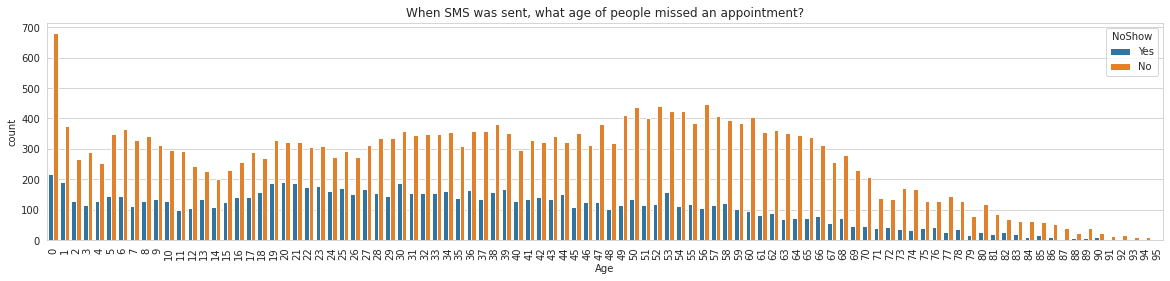

In [77]:
NoShow_SMSSent = df[df.SMSReceived == 1].loc[:]

plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.countplot(x=NoShow_SMSSent.Age, hue=NoShow_SMSSent.NoShow)
plt.title("When SMS was sent, what age of people missed an appointment?")

Text(0.5, 1.0, 'When SMS was sent, what age of people missed an appointment?')

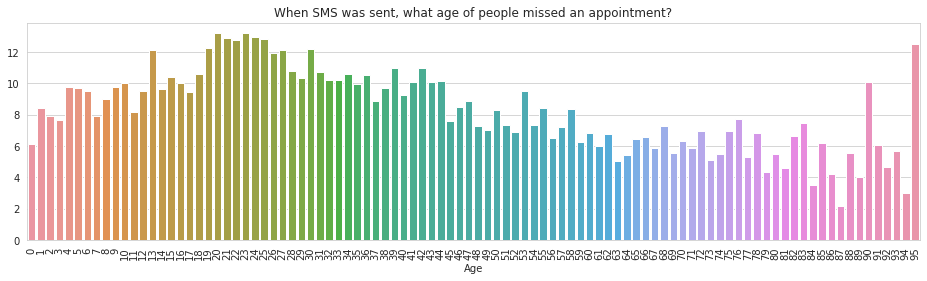

In [74]:
AgeSMSSent_ratio = NoShow_SMSSent[NoShow_SMSSent.NoShow == 'Yes'].groupby(['Age']).size()/df.groupby(['Age']).size() * 100

plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.barplot(x = AgeSMSSent_ratio.index, y=AgeSMSSent_ratio)
plt.title("When SMS was sent, what age of people missed an appointment?")

   - **Of the patients who got an SMS reminder, the 55-89 age group were least likely to miss the appointment**
   - **When the SMS is sent, patients in the age range of 19-30 are most likely to miss an appointment**

Text(0.5, 1.0, "When SMS wasn't sent, what age of people missed an appointment?")

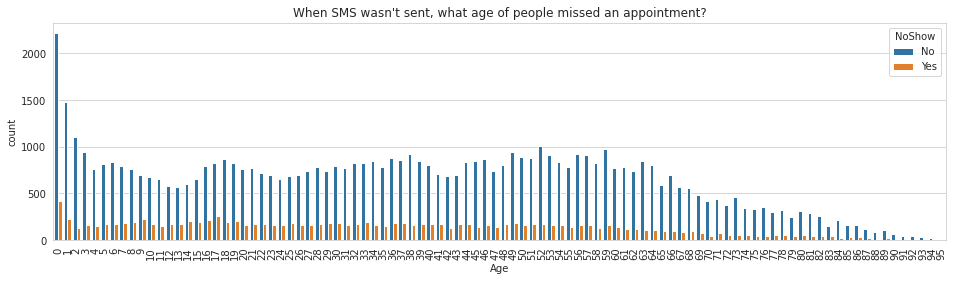

In [75]:
NoShow_SMSNotSent = df[df.SMSReceived == 0].loc[:]

plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.countplot(x=NoShow_SMSNotSent.Age, hue=NoShow_SMSNotSent.NoShow)
plt.title("When SMS wasn't sent, what age of people missed an appointment?")

Text(0.5, 1.0, "When SMS wasn't sent, what age of people missed an appointment?")

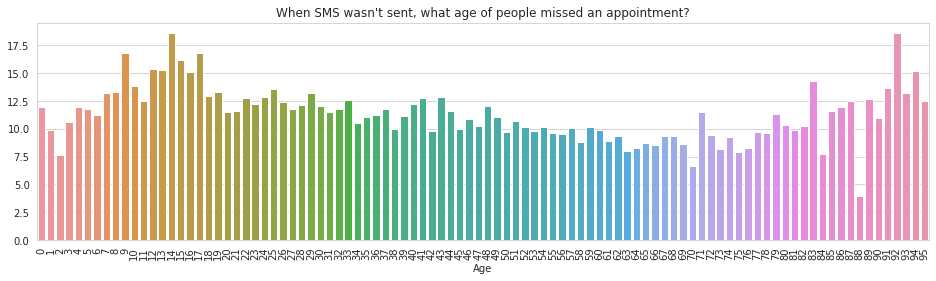

In [76]:
AgeSMSNotSent_ratio = NoShow_SMSNotSent[NoShow_SMSNotSent.NoShow == 'Yes'].groupby(['Age']).size()/df.groupby(['Age']).size() * 100

plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.barplot(x = AgeSMSNotSent_ratio.index, y=AgeSMSNotSent_ratio)
plt.title("When SMS wasn't sent, what age of people missed an appointment?")

   - **When the SMS is not sent, patients in the 12-18 age group are most likely to miss an appointment**
   - **When an SMS is not sent, patients in the 53-73 age grup are least liekly to miss an appointment**

### 2.7 Waiting Period Analysis

- Appointment Day Analysis

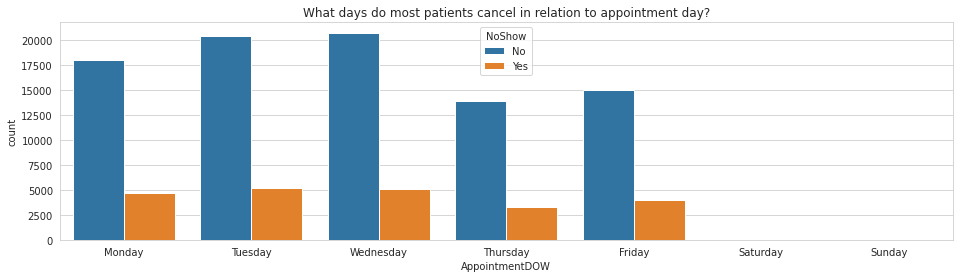

In [71]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.AppointmentDOW, hue=df.NoShow, order=days)
ax.set_title("What days do most patients cancel in relation to appointment day?")
plt.show()

Text(0.5, 1.0, 'What days do most patients cancel in relation to appointment day?')

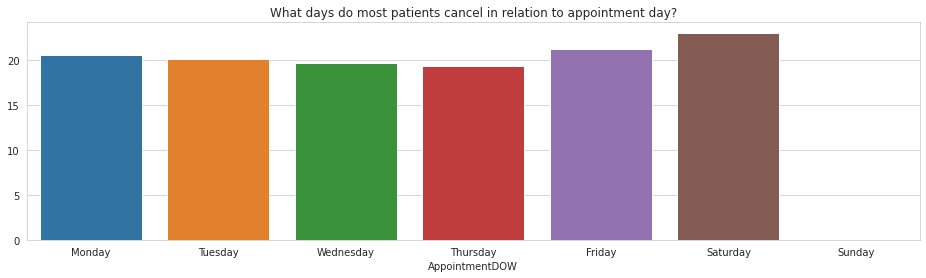

In [70]:
plt.figure(figsize=(16,4))
appnmnt_ratio = df[df.NoShow == 'Yes'].groupby(['AppointmentDOW']).size() / df.groupby(['AppointmentDOW']).size() * 100
ax = sns.barplot(x=appnmnt_ratio.index, y=appnmnt_ratio, order=days)
ax.set_title("What days do most patients cancel in relation to appointment day?")

   - **The rate of not showing up is pretty uniform for the weekdays**
   - **Weekends show the highest appointment missing rates**

     - Scheduled Day Analysis

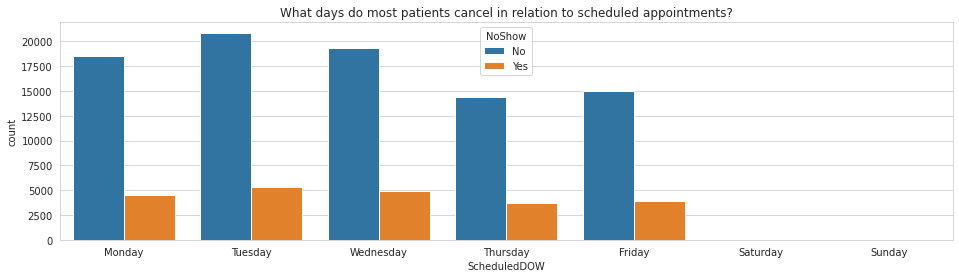

In [68]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.ScheduledDOW, hue=df.NoShow, order=days)
ax.set_title("What days do most patients cancel in relation to scheduled appointments?")
plt.show()

Text(0.5, 1.0, 'What days do most patients cancel in relation to scheduled appointments?')

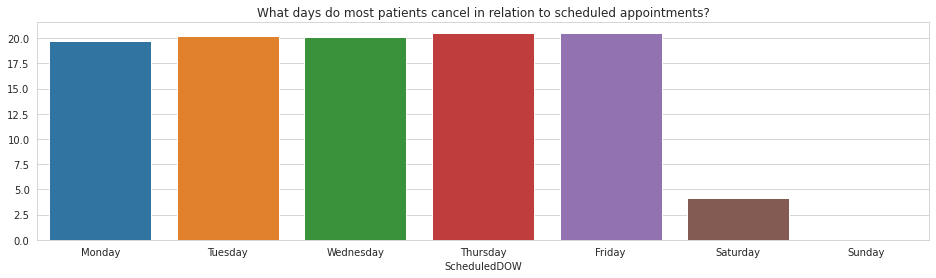

In [69]:
plt.figure(figsize=(16,4))
schdl_ratio = df[df.NoShow == 'Yes'].groupby(['ScheduledDOW']).size() / df.groupby(['ScheduledDOW']).size() * 100
ax = sns.barplot(x=schdl_ratio.index, y=schdl_ratio, order=days)
ax.set_title("What days do most patients cancel in relation to scheduled appointments?")

   - **The rate of cancellation is uniform across the week but if scheduled on a Saturday, the levels of missing an appointment are at a negligible 2.5%**

    - Waiting Period Analysis

Text(0.5, 1.0, 'What waiting periods affect appointment cancellations?')

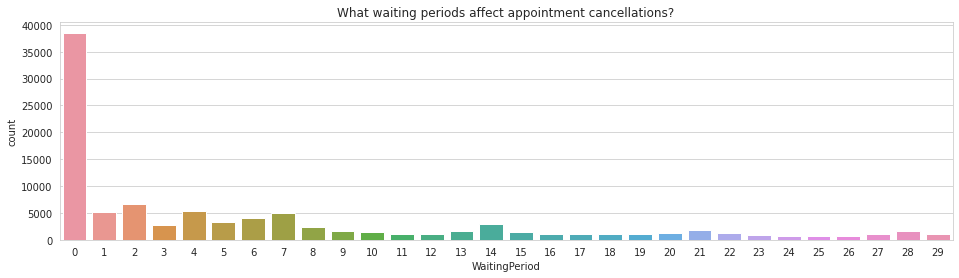

In [64]:
plt.figure(figsize=(16,4))
sns.countplot(x=df.WaitingPeriod, order=df.WaitingPeriod.iloc[:30].index)
plt.title("What waiting periods affect appointment cancellations?")

Text(0.5, 1.0, 'What waiting periods affect appointment cancellations?')

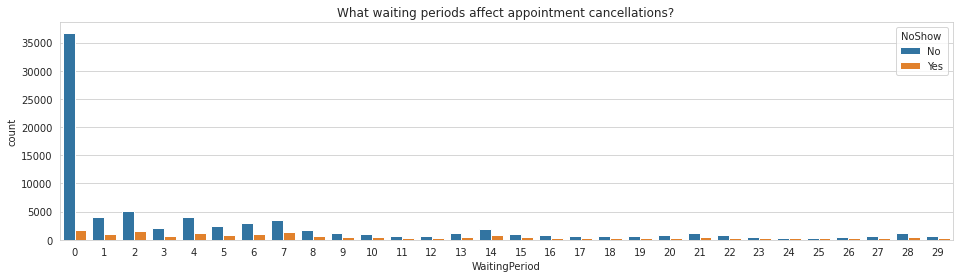

In [63]:
plt.figure(figsize=(16,4))
sns.countplot(x=df.WaitingPeriod, hue=df.NoShow, order=df.WaitingPeriod.iloc[:30].index)
plt.title("What waiting periods affect appointment cancellations?")

Text(0.5, 1.0, 'What waiting periods affect appointment cancellations?')

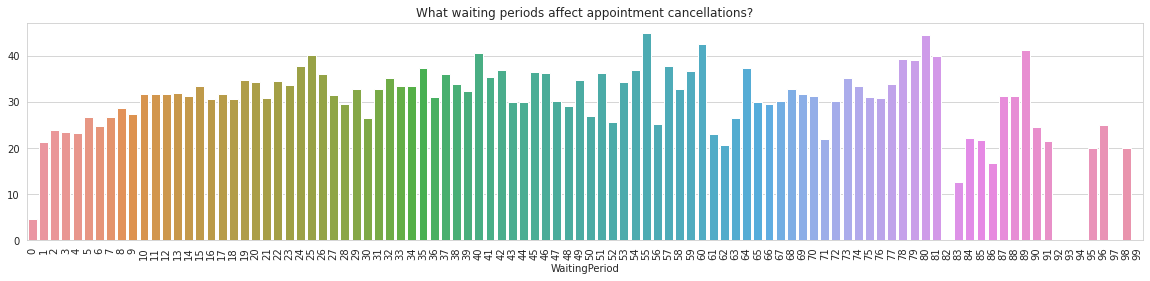

In [62]:
plt.figure(figsize=(20,4))
wait_ratios = df[df.NoShow == 'Yes'].groupby(df.WaitingPeriod).size() / df.groupby(df.WaitingPeriod).size() * 100
plt.xticks(rotation=90)
sns.barplot(x=wait_ratios.index, y=wait_ratios, order=df.WaitingPeriod.iloc[:100].index)
plt.title("What waiting periods affect appointment cancellations?")

   - **Statistically, the least cancellations are for patients seen on the same day**
   - **Cancellation rate is at about 20% in the first week**
   - **Cancellation rate in the second week is at 30%**
   - **The third week and beyond,  the cancellation averages to about 35%**
   - **The probability of cancellation goes up a lot if the difference between the scheduled call to the appointment is between 50-60 days or anything over 77 days**

    - Hour Analysis

Text(0.5, 1.0, 'When do patients miss the most appointments?')

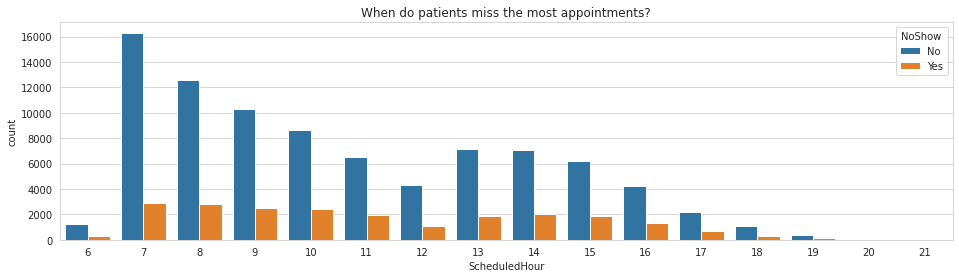

In [59]:
plt.figure(figsize=(16,4))
sns.countplot(x=df.ScheduledHour, hue=df.NoShow)
plt.title("When do patients miss the most appointments?")

Text(0.5, 1.0, 'When do patients miss the most appointments?')

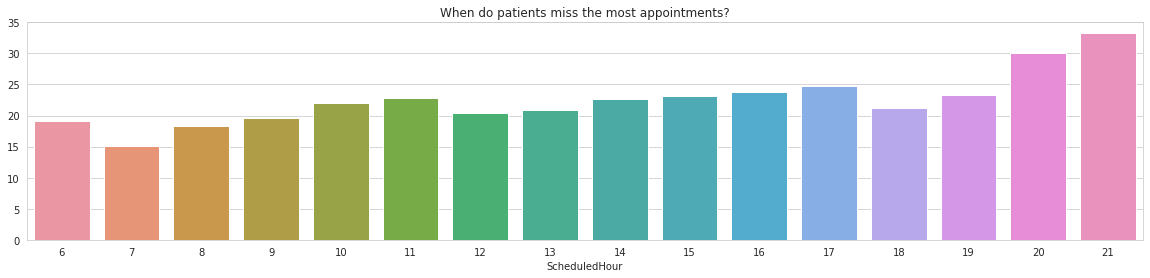

In [60]:
plt.figure(figsize=(20,4))
hour_ratios = df[df.NoShow == 'Yes'].groupby(df.ScheduledHour).size() / df.groupby(df.ScheduledHour).size() * 100
sns.barplot(x=hour_ratios.index, y=hour_ratios)
plt.title("When do patients miss the most appointments?")

- **Least cancellation happen at 7 am appointment time**
- **11am and 5pm appointments have a cancellation rate of about 25%**
- **Cancellations are highest after 8 pm**

Text(0.5, 1.0, 'At what hour on specific days do patients miss the most appointments?')

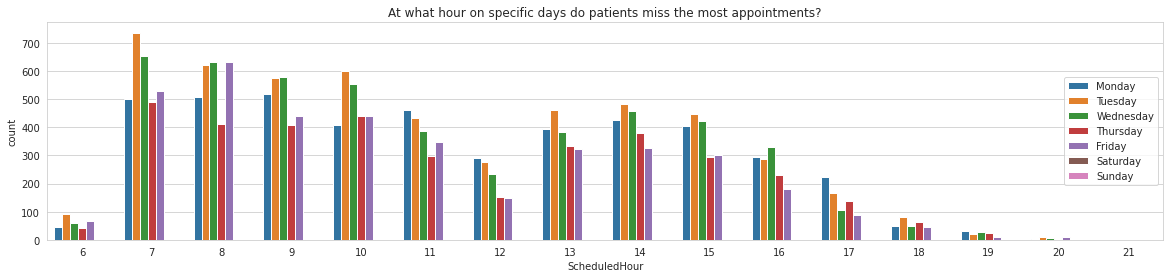

In [65]:
sched_noShow = df[df.NoShow == 'Yes'].loc[:, ]
plt.figure(figsize=(20,4))
ax = sns.countplot(x=sched_noShow.ScheduledHour, hue=sched_noShow.ScheduledDOW, hue_order=days)
ax.legend(loc='right')
plt.title("At what hour on specific days do patients miss the most appointments?")

   - **Vast majority of cancellations happen in the morning hours**
   - **Tuesday and Wednesday seem to consistently score higher in the number of cancellations**